# Titanic Survival Prediction using Logistic Regression
# Clean, Portable, and Reproducible Version

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Display settings
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, linewidth=100)

In [38]:
sns.set(style="whitegrid")

# Load the Dataset

In [39]:
titanic = sns.load_dataset("titanic")
print("Dataset Shape:", titanic.shape)
titanic.head()

Dataset Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


# 🔍 3. Exploratory Analysis

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [41]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


In [42]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [43]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [44]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


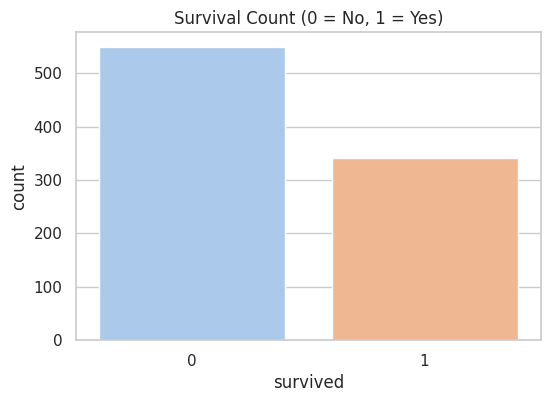

In [45]:
# Basic survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=titanic, palette="pastel", hue="survived", legend = False)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

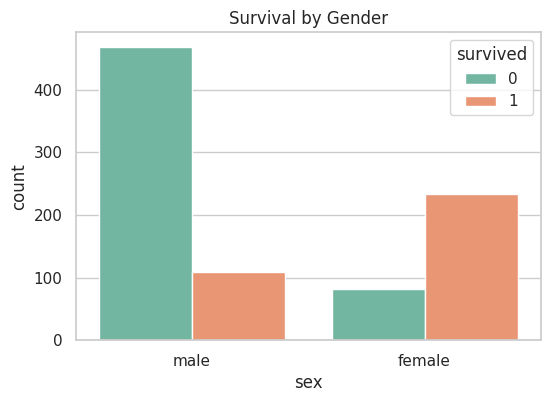

In [46]:
# Gender-wise survival
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="survived", data=titanic, palette="Set2")
plt.title("Survival by Gender")
plt.show()

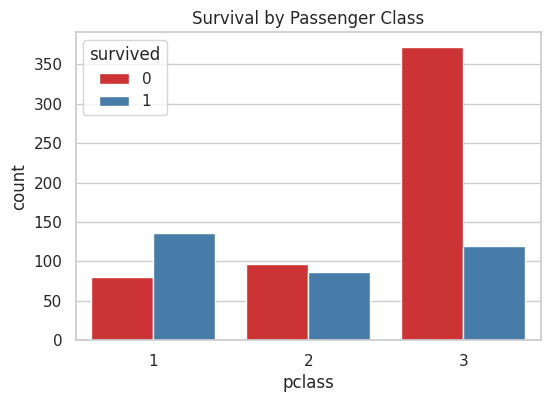

In [47]:
# Class-wise survival
plt.figure(figsize=(6,4))
sns.countplot(x="pclass", hue="survived", data=titanic, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

# 🧹 4. Data Preprocessing

In [48]:
# Drop columns not needed
titanic.drop(columns=["deck", "embark_town", "alive", "class", "who", "adult_male", "alone"], inplace=True)

In [49]:
# Check missing values
print("Missing Values:\n", titanic.isnull().sum())

Missing Values:
 survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64


In [50]:
# Fill missing values
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])

In [51]:
# Encode categorical features
titanic["sex"] = titanic["sex"].replace({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].replace({"S": 0, "C": 1, "Q": 2})

/tmp/ipython-input-51-2896182644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["sex"] = titanic["sex"].replace({"male": 0, "female": 1})
/tmp/ipython-input-51-2896182644.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["embarked"] = titanic["embarked"].replace({"S": 0, "C": 1, "Q": 2})


In [52]:
# Final feature selection
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

In [53]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 5. Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧪 6. Logistic Regression

In [55]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# 📊 7. Model Evaluation & Results

In [56]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [57]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred) * 100)

Training Accuracy: 80.19662921348315
Testing Accuracy : 79.88826815642457


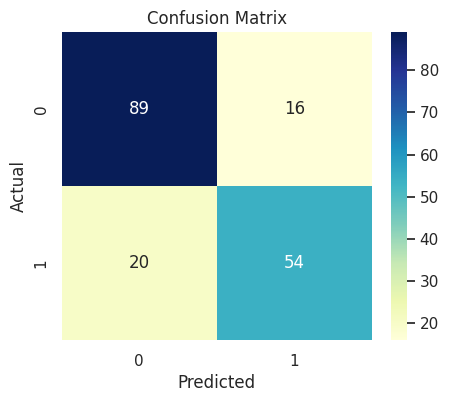

In [58]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# 💾 8. Save the Model

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import joblib

# Define full path where you want to save the model
model_path = '/content/drive/My Drive/Colab Notebooks/Titanic Survival Prediction/titanic_logistic_model.pkl'

# Save the model
joblib.dump(model, model_path)

print("✅ Model saved at:", model_path)


✅ Model saved at: /content/drive/My Drive/Colab Notebooks/Titanic Survival Prediction/titanic_logistic_model.pkl
